<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_B_PyTorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@title Defining Imports
#numpy
import numpy as np
#PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
#plotting
from matplotlib import pyplot as plt

In [ ]:
#@title Setting Hyperparameters
learning_rate = 3.5e-03
epochs = 500
middle_layer = 5

# Creating Data

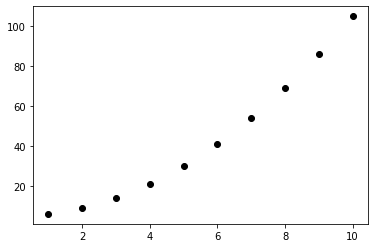

In [ ]:
#@title Creating data from function and reshaping
def function(X):
  return X * X + 5.

X = np.array([[1.],[2.],[3.],[4.],[5.],[6.],[7.],[8.],[9.],[10.]])
y = function(X)
inputs = X.shape[1]
y = y.reshape(-1, 1)
plt.plot(X, y, 'o', color='black')
plt.plot(Xi,yi, color="red")

# Building the Model

In [ ]:
#@title Define the Model
class Net(nn.Module):
  def __init__(self, inputs, middle):
    super().__init__()
    self.fc1 = nn.Linear(inputs,middle)
    self.fc2 = nn.Linear(middle,middle)
    self.out = nn.Linear(middle,1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
#@title Create the model
model = Net(inputs, middle_layer)
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
#@title Define loss function (criterion) and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Streaming output truncated to the last 5000 lines.
[0/0] Loss = 1454.5501708984375
[0/1] Loss = 1216.028076171875
[0/2] Loss = 877.7882080078125
[0/3] Loss = 502.6607666015625
[0/4] Loss = 175.9113311767578
[0/5] Loss = 4.71026611328125
[0/6] Loss = 117.61140441894531
[0/7] Loss = 664.0396728515625
[0/8] Loss = 1813.78759765625
[0/9] Loss = 3756.521240234375
[1/0] Loss = 1454.5501708984375
[1/1] Loss = 1216.028076171875
[1/2] Loss = 877.7882080078125
[1/3] Loss = 502.6607666015625
[1/4] Loss = 175.9113311767578
[1/5] Loss = 4.71026611328125
[1/6] Loss = 117.61140441894531
[1/7] Loss = 664.0396728515625
[1/8] Loss = 1813.78759765625
[1/9] Loss = 3756.521240234375
[2/0] Loss = 1454.5501708984375
[2/1] Loss = 1216.028076171875
[2/2] Loss = 877.7882080078125
[2/3] Loss = 502.6607666015625
[2/4] Loss = 175.9113311767578
[2/5] Loss = 4.71026611328125
[2/6] Loss = 117.61140441894531
[2/7] Loss = 664.0396728515625
[2/8] Loss = 1813.78759765625
[2/9] Loss = 3756.521240234375
[3/0] Loss = 1454.5

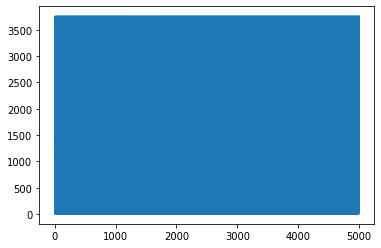

In [ ]:
#@title Training the Model
history = []
for i in range(epochs):        
  for batch_ind in range(X.shape[0]):
    # wrap the data in variables
    x_batch = Variable(torch.Tensor(X[batch_ind]))
    y_batch = Variable(torch.Tensor(y[batch_ind]))                   
    # forward pass
    y_pred = model(x_batch)        
    # compute and print loss
    loss = loss_fn(y_pred, y_batch)  
    history.append(loss.data) 
    print(f"[{i}/{batch_ind}] Loss = {loss.data}")    
    # reset gradients
    optimizer.zero_grad()        
    # backwards pass
    loss.backward()        
    # step the optimizer - update the weights
    optimizer.step()
    
plt.plot(history)

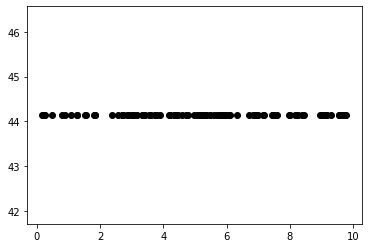

In [ ]:
X_a = torch.rand(100,1).clone() * 10
y_a = model(X_a)
y_a = y_a.detach().numpy()
plt.plot(X_a, y_a, 'o', color='black')